# Assignment #3

Team: <br>
LASRI Mouad 2021021597 <br>
GEMEDA Metasebia 2020010593

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(42)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import collections

%matplotlib inline

In [3]:
from datetime import datetime as dt
import scipy as sc
import random

In [4]:
def makeData(N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

In [5]:
image_data, filter_data, output_data = makeData() 

In [6]:
def c2d(I,F,O):
    for im in range(len(I[0,0])):
        for fi in range(len(F[0,0])):
            img = I[:,:,im]
            fil = F[:,:,fi]
            O[:,:,im,fi]=sc.signal.convolve2d(img,fil,mode='same', boundary='fill', fillvalue=0)
    return O

In [7]:
def c2dfft(I,F,O):
    for im in range(len(I[0,0])):
        for fi in range(len(F[0,0])):
            img = I[:,:,im]
            fil = F[:,:,fi]
            O[:,:,im,fi]=sc.signal.fftconvolve(img,fil,mode='same')
    return O

In [8]:
st1 =  dt.timestamp(dt.now())
O1 = c2d(image_data, filter_data, output_data)
#et1= dt.time()
elapsed_time1 =  dt.timestamp(dt.now())- st1
print('Execution time:', elapsed_time1, 'seconds')

Execution time: 2.2877719402313232 seconds


In [9]:
st2 = dt.timestamp(dt.now())
O2 = c2dfft(image_data, filter_data, output_data)
#et2= dt.time() 
elapsed_time2 = dt.timestamp(dt.now())- st2
print('Execution time:', elapsed_time2, 'seconds')

Execution time: 0.043324947357177734 seconds


In [11]:
elapsed_time_conv = np.zeros([30,1])
elapsed_time_fft = np.zeros([30,1])
for i in range(30):
    seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) # M--> filter size from 1 to 20
    
    
    #finding execution time for function c2d
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2d(image_data, filter_data, output_data)
    elapsed_time_conv[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2dfft
    st2 =  dt.timestamp(dt.now())
    O2 = c2dfft(image_data, filter_data, output_data)
    elapsed_time_fft[i] =  dt.timestamp(dt.now())- st2    

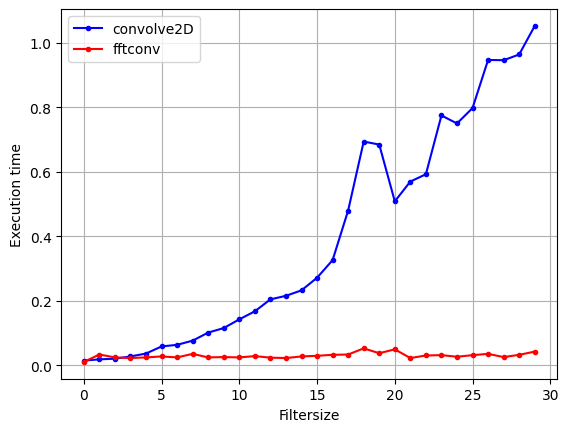

In [12]:
plt.plot(elapsed_time_conv,'b.-')
plt.plot(elapsed_time_fft,'r.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'fftconv'])
plt.grid()


It seems that the fft convolve becomes faster than the convolve2D function after M=3. The convolve 2D's execution time increases in somhow exponential manner with filter size. But the FFT convolution execution time is unaffected maorely by the filter size

## Ordering of Arrays

To find which ordering of teh arrays is faster, we define a new 'makeData' function

In [13]:
def makeData2(N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(numimg, N, N)
    F = np.random.rand(numfilt, M, M)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

In [14]:
def c2d_new(I,F,O):
    for im in range(len(I)):
        for fi in range(len(F)):
            img = I[im, :,:]
            fil = F[fi, :,:]
            O[ :,:, im,fi]=sc.signal.convolve2d(img,fil,mode='same', boundary='fill', fillvalue=0)
    return O

In [15]:
def c2dfft_new(I,F,O):
    for im in range(len(I)):
        for fi in range(len(F)):
            img = I[im, :,:]
            fil = F[fi, :,:]
            O[:,:, im,fi]=sc.signal.fftconvolve(img,fil,mode='same')
    return O

In [16]:
elapsed_time_conv2 = np.zeros([30,1])
elapsed_time_fft2 = np.zeros([30,1])
for i in range(30):
    seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    image_data, filter_data, output_data = makeData2(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) # M--> filter size from 1 to 20
    
    
    #finding execution time for function c2d
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2d_new(image_data, filter_data, output_data)
    elapsed_time_conv2[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2dfft
    st2 =  dt.timestamp(dt.now())
    O2 = c2dfft_new(image_data, filter_data, output_data)
    elapsed_time_fft2[i] =  dt.timestamp(dt.now())- st2    

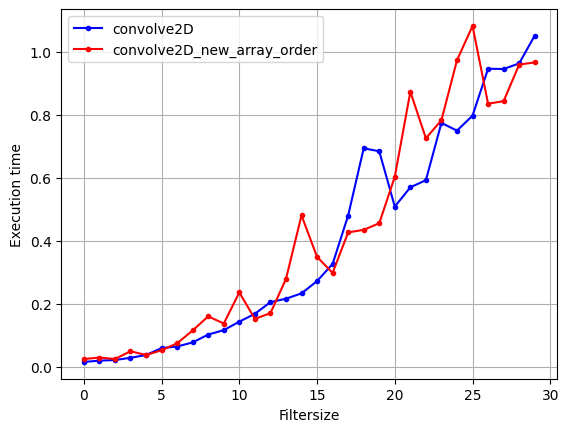

In [17]:
plt.plot(elapsed_time_conv,'b.-')
plt.plot(elapsed_time_conv2,'r.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'convolve2D_new_array_order'])
plt.grid()


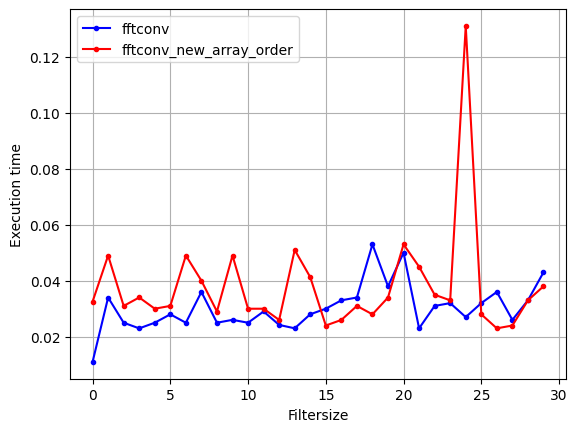

In [18]:
plt.plot(elapsed_time_fft,'b.-')
plt.plot(elapsed_time_fft2,'r.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['fftconv', 'fftconv_new_array_order'])
plt.grid()


It seems the ordering of the arrays does not affect execution time!